# Importing Necessary Libraries

This section of the code imports several libraries for data analysis and machine learning in Python.

In [46]:
import pandas as pd # library for data manipulation and analysis
import matplotlib.pyplot as plt # Plotting library for data visualization
import seaborn as sns
import numpy as np # for numerical and array operations
from sklearn.decomposition import PCA # for dimensionality reduction and feature extraction.
from sklearn.model_selection import train_test_split as tts # to split a dataset into two parts: training and testing set
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Loading the Dataset

This section of our code loads our data dataset into a pandas DataFrame named df and also displays the contents of the DataFrame.

In [47]:
# Reading a csv file "Fish.csv" into a Pandas DataFrame and storing it in a variable "df".
df = pd.read_csv("Fish.csv")
# Using the `sample` method from the Pandas DataFrame to display 10 randomly selected rows from the DataFrame "df".
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
81,Perch,85.0,18.2,20.0,21.0,5.0820,2.7720
51,Roach,180.0,23.6,25.2,27.9,7.0866,3.9060
29,Bream,1000.0,33.5,37.0,42.6,18.9570,6.6030
70,Parkki,273.0,23.0,25.0,28.0,11.0880,4.1440
45,Roach,160.0,20.5,22.5,25.3,7.0334,3.8203
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
94,Perch,150.0,21.0,23.0,24.5,5.2185,3.6260
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
68,Parkki,145.0,19.8,21.5,24.1,9.7364,3.1571


# Data Understanding, Cleaning and Transformation:

In this Section of our code we will do some preprocessing of our data by reviewing, correcting, and transforming the data to a format that is usable for analysis and modeling.

In [48]:
# Get number of rows and columns in DataFrame
rows, cols = df.shape
# Print number of rows and columns
print("Number of rows:", rows)
print("Number of columns:", cols)

Number of rows: 159
Number of columns: 7


Printing out information about the DataFrame, including the number of rows, number of columns, data types of each column, number of non-null values in each column, memory usage, and other relevant informations using buit-in method info() of pandas dataframe.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


As we can see from our above information there in no any null values in our dataset therefore no data cleaning in particular is required but the same cannot be said for outliers

Plotting a box plot for every float type columns to check whether there any outliers in the given dataset or not.

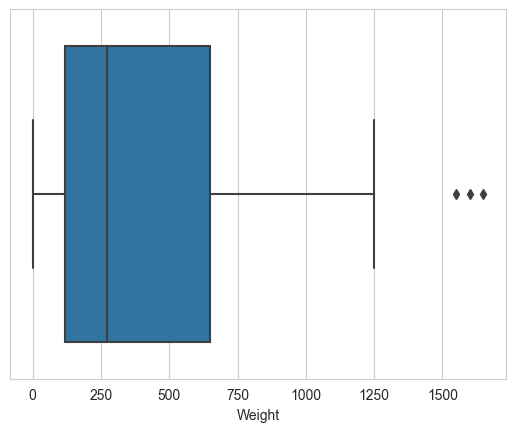

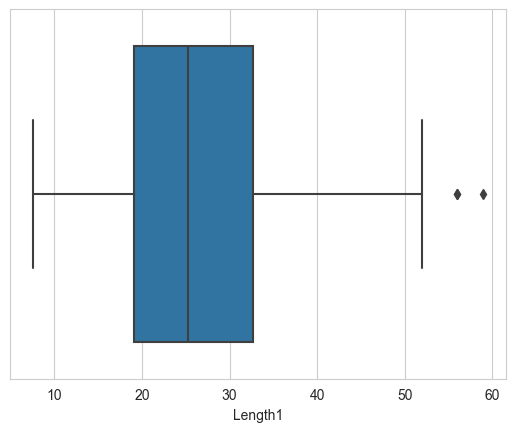

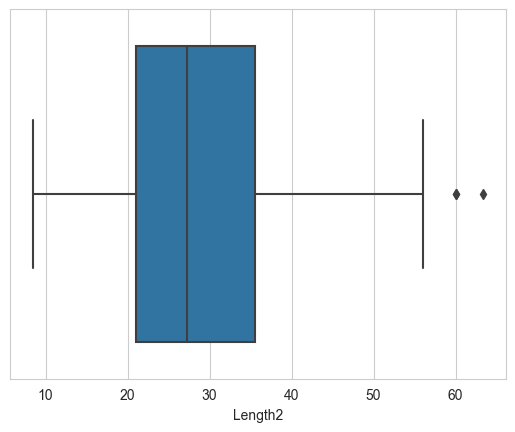

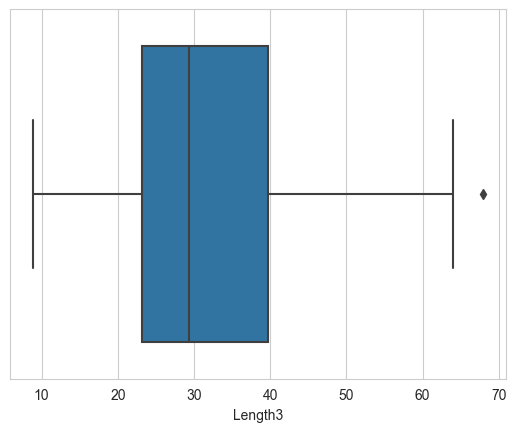

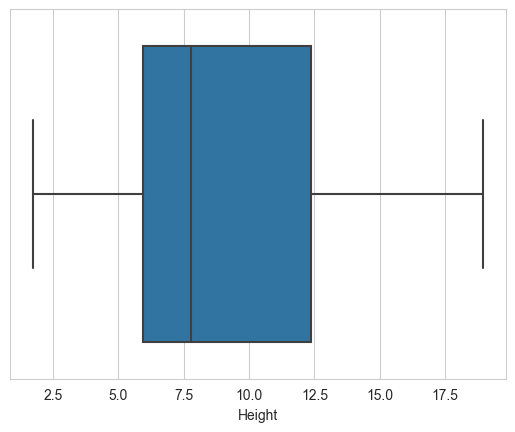

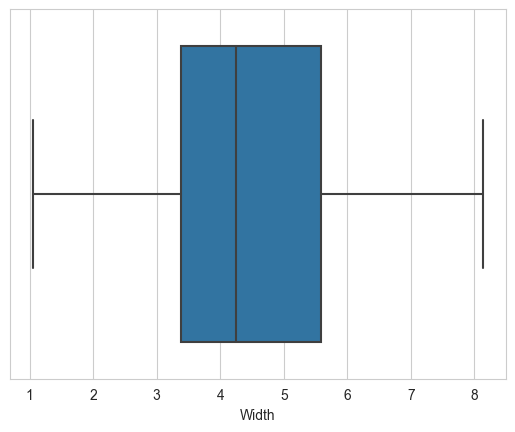

In [50]:
# Set the seaborn plot style to whitegrid
sns.set_style("whitegrid")
# Create a box plot of the "Weight" column of the DataFrame
sns.boxplot(x = df["Weight"])
plt.show()
# Create a box plot of the "Length1" column of the DataFrame
sns.boxplot(x = df["Length1"])
plt.show()
# Create a box plot of the "Length2" column of the DataFrame
sns.boxplot(x = df["Length2"])
plt.show()
# Create a box plot of the "Length3" column of the DataFrame
sns.boxplot(x = df["Length3"])
plt.show()
# Create a box plot of the "Height" column of the DataFrame
sns.boxplot(x = df["Height"])
plt.show()
# Create a box plot of the "Width" column of the DataFrame
sns.boxplot(x = df["Width"])
plt.show()

From above box plots we can clearly see that there are some presence of outliers in the Weight and lengths of our dataset that needs to be deal with before further processing.

In [51]:
# Define a function that filters outliers from a given DataFrame column
def filter_outliers(df, col_name):
    # Calculate Q1 (first quartile), Q3 (third quartile)
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1 # inter-quartile range
    # Calculate lower fence and upper fence
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    # Filter data points that are outside of the lower and upper fences
    df = df[(df[col_name] > lower_fence) & (df[col_name] < upper_fence)]
    # Return the filtered DataFrame
    return df

Assigning our new fitered out dataframe to a new df variable

In [52]:
print(f"Original Dataframe shape : {df.shape}")
df = filter_outliers(df, "Weight")
print(f"Filtered DataFrame shape : {df.shape}")

Original Dataframe shape : (159, 7)
Filtered DataFrame shape : (156, 7)


Printing out all uniques values of the object type column Species with their counts in our dataset 

In [53]:
# Count the number of occurrences of each species in the 'Species' column of the 'df' DataFrame
Species_count = df['Species'].value_counts()
# Convert the result to a DataFrame 
Species_count = pd.DataFrame(Species_count)
Species_count # Displaying the dataframe

,Species
Perch,56
Bream,35
Roach,20
Pike,14
Smelt,14
Parkki,11
Whitefish,6


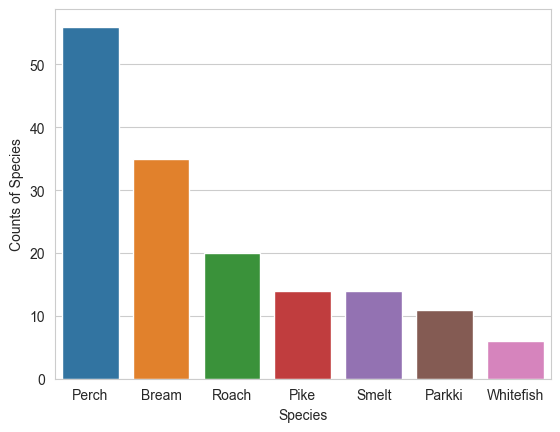

In [54]:
# Plot a bar graph of the species count
sns.barplot(x = Species_count.index, y = Species_count['Species'])
# Label the x-axis as 'Species'
plt.xlabel('Species')
# Label the y-axis as 'Counts of Species'
plt.ylabel('Counts of Species')
# Show the plot
plt.show()

The given dataset ("Fish.csv") contains 7 columns out of which only one column Species is of object type and the rest are of type float.There are a total of 159 rows in the dataset. The provided dataset can be used for both predicting and classifying. However, we can see that our data is imbalanced in case of Species i.e. number of examples for each species varies leading to overfitting of our model.

Transforming our column Species which is a categorical data to a numerical data by using map function to make the results of our model more interpretable.

In [55]:
df["Species"] = df["Species"].map({'Perch': 0,'Bream': 1,'Roach': 2,'Pike': 3,'Smelt': 4,'Parkki': 5, 'Whitefish': 6})
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,4,12.2,11.5,12.2,13.4,2.0904,1.3936
155,4,13.4,11.7,12.4,13.5,2.4300,1.2690
156,4,12.2,12.1,13.0,13.8,2.2770,1.2558
157,4,19.7,13.2,14.3,15.2,2.8728,2.0672


# Data Analysis

Generating descriptive statistics of our dataset using describe() function that calculates various summary statistics such as mean, standard deviation, minimum and maximum values, and quartiles

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Species,156.0,1.692308,1.812556,0.0000,0.000000,1.0000,3.000000,6.000
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
Length1,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
Length2,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
Length3,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


Displaying matrix representing the correlation coefficient for each pair of columns in the DataFrame. The correlation coefficient is a value between -1 and 1 that indicates the strength and direction of a linear relationship between two columns.

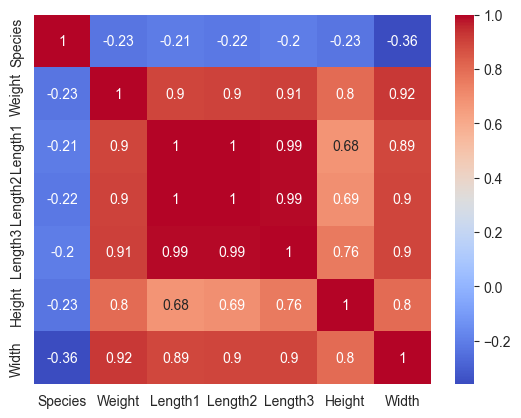

In [57]:
# Calculate the correlation matrix for the DataFrame 'df'
corr = df.corr()
# Plot a heatmap of the correlation matrix with annotations and the 'coolwarm' color map
sns.heatmap(corr, annot=True, cmap='coolwarm')
# Show the plot
plt.show()

The above heatmap calculates and shows the correlation between the target column Weight with the features like "Species", "Length1", "Length2","Length3","Height","Width". From this we can see that the Length1, length2,length3 of the fish is highly correlated with our target however we can also see that these features also have high correlation with each other meaning they are more linearly dependent and have almost the same effect on the target while the correlation between Species of the fish and our target is comparatively lower.

# Data Visualisation

In this section of our code we will be using scatter plot to better understand the correlation between our target and features as it is a very useful way to visualize the relationship between two variables

Weight vs Length1

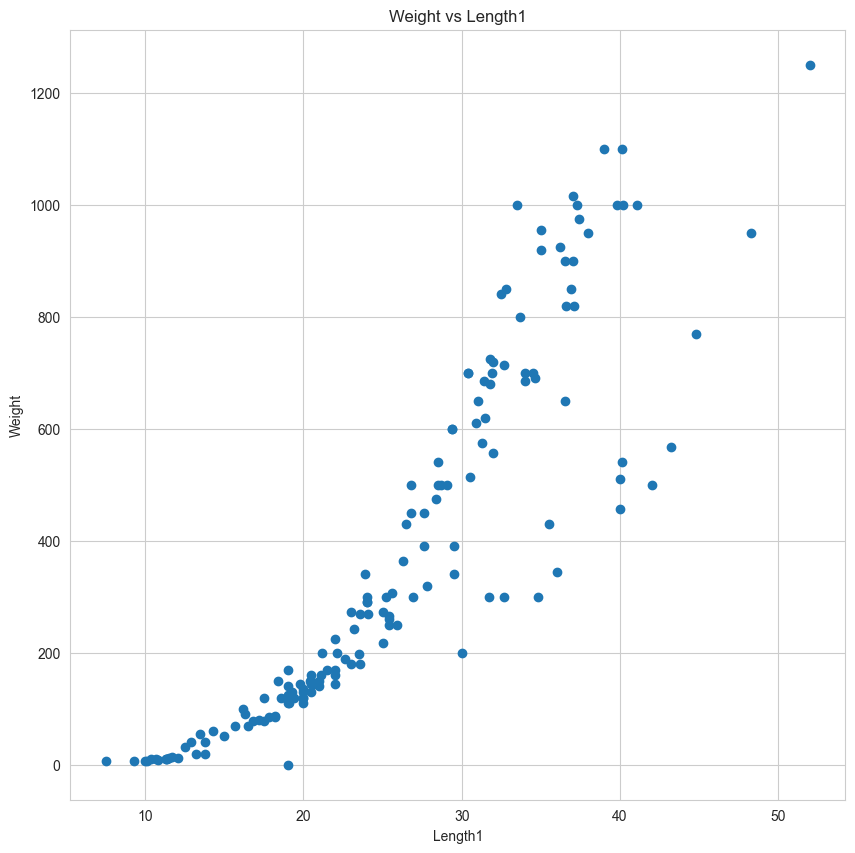

In [58]:
# Set the size of the plot to (10,10)
plt.figure(figsize=(10,10))
# Plot a scatter plot of 'Weight' vs 'Length1'
plt.scatter(x=df["Length1"], y=df["Weight"])
# Label the x-axis as 'Length1'
plt.xlabel('Length1')
# Label the y-axis as 'Weight'
plt.ylabel('Weight')
# Set the title of the plot as 'Weight vs Length1'
plt.title("Weight vs Length1")
# Display the grid in the plot
plt.grid(True)
# Show the plot
plt.show()

Weight vs Length2

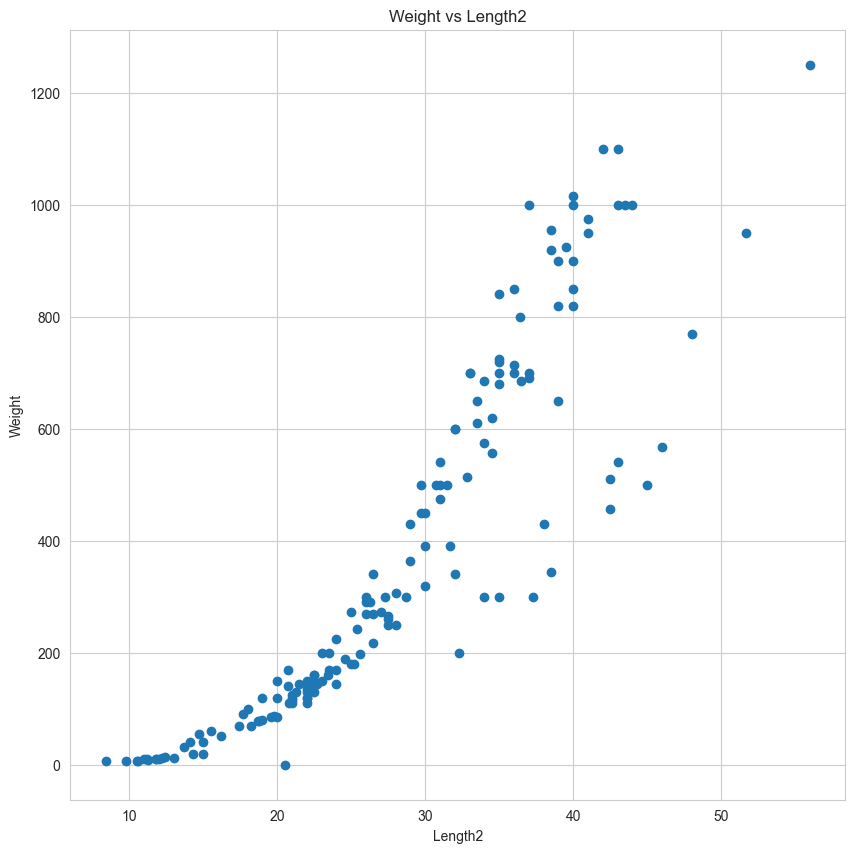

In [59]:
# Set the size of the plot to (10,10)
plt.figure(figsize=(10,10))
# Plot a scatter plot of 'Weight' vs 'Length2'
plt.scatter(x=df["Length2"], y=df["Weight"])
# Label the x-axis as 'Length2'
plt.xlabel('Length2')
# Label the y-axis as 'Weight'
plt.ylabel('Weight')
# Set the title of the plot as 'Weight vs Length2'
plt.title('Weight vs Length2')
# Display the grid in the plot
plt.grid(True)
# Show the plot
plt.show()

Weight vs Length3

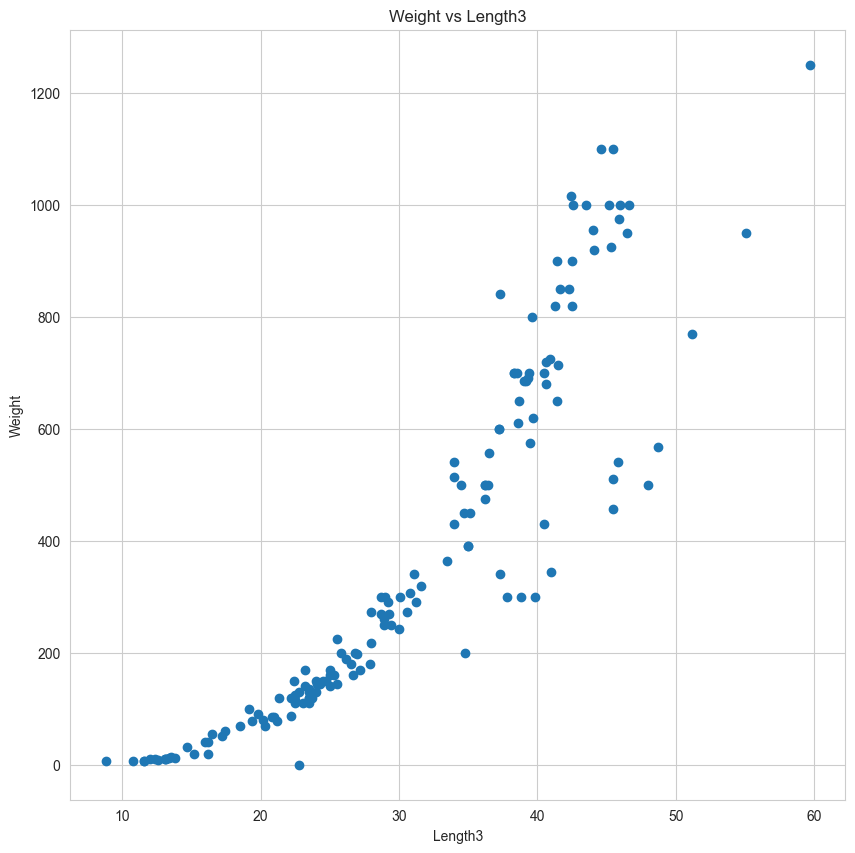

In [60]:
# Set the size of the plot to (10,10)
plt.figure(figsize=(10,10))
# Plot a scatter plot of 'Weight' vs 'Length3'
plt.scatter(x=df["Length3"], y=df["Weight"])
# Label the x-axis as 'Length3'
plt.xlabel('Length3')
# Label the y-axis as 'Weight'
plt.ylabel('Weight')
# Set the title of the plot as 'Weight vs Length3'
plt.title("Weight vs Length3")
# Display the grid in the plot
plt.grid(True)
# Show the plot
plt.show()

Weight vs Height

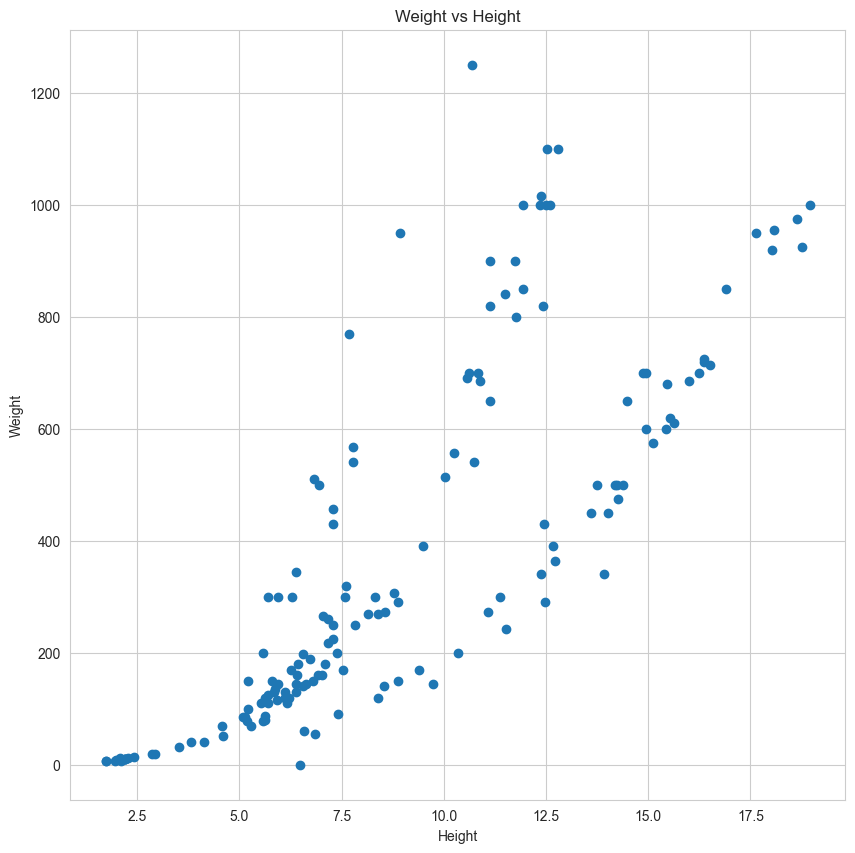

In [61]:
# Set the size of the plot to (10,10)
plt.figure(figsize=(10,10))
# Plot a scatter plot of 'Weight' vs 'Height'
plt.scatter(x=df["Height"], y=df["Weight"])
# Label the x-axis as 'Height'
plt.xlabel('Height')
# Label the y-axis as 'Weight'
plt.ylabel('Weight')
# Set the title of the plot as 'Weight vs Height'
plt.title("Weight vs Height")
# Display the grid in the plot
plt.grid(True)
# Show the plot
plt.show()

Weight vs Width

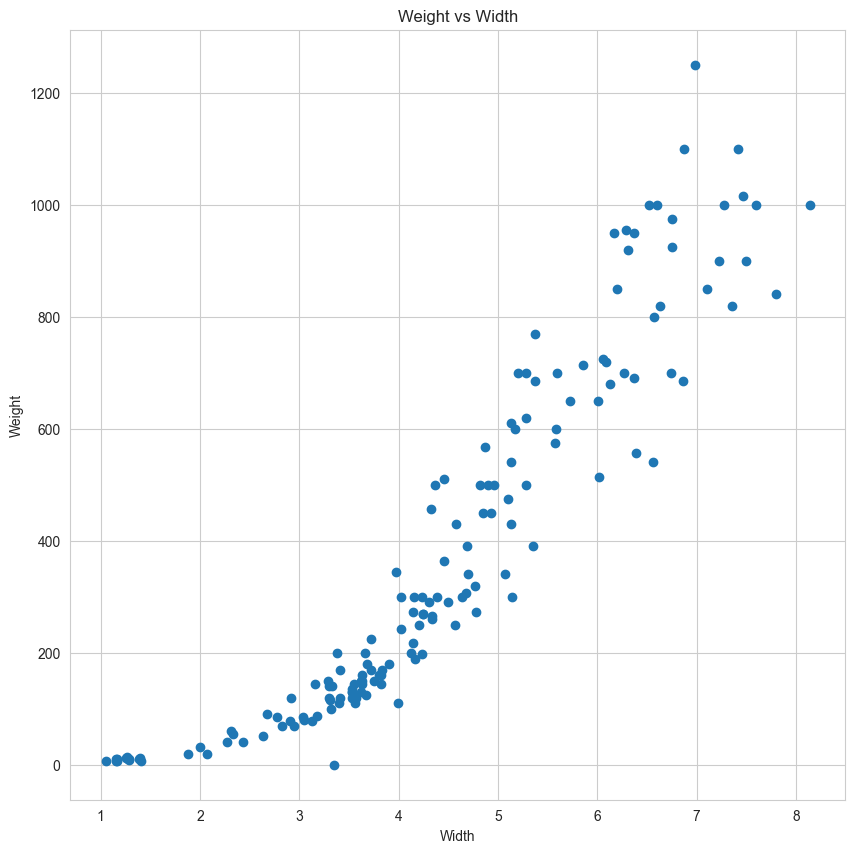

In [62]:
# Set the size of the plot to (10,10)
plt.figure(figsize=(10,10))
# Plot a scatter plot of 'Weight' vs 'Width'
plt.scatter(x=df["Width"], y=df["Weight"])
# Label the x-axis as 'Width'
plt.xlabel('Width')
# Label the y-axis as 'Weight'
plt.ylabel('Weight')
# Set the title of the plot as 'Weight vs Width'
plt.title("Weight vs Width")
# Display the grid in the plot
plt.grid(True)
# Show the plot
plt.show()

From above Scatter plots we can visually understand that how our target column Weight is highly correlated with the features like "Length1", "Length2","Length3","Width".

# Splitting Dataset into Training and Testing set

In this section, we will be splitting our original dataset into training and testing dataset to evaluate our model that is trained using only training dataset which helps to prevent overfitting of our model.

Splitting theaset such that 80% of the data goes into the train set and remaining 20% of the data goes into the test set. The random_state argument is used to set a random seed for the random number generator used to perform the split that helps ensure that the same split is obtained each time the code is run with the same random seed.

In [63]:
train, test = tts(df, train_size = 0.7, random_state = 20)

Specifying the target and features for our training set

In [64]:
# Select the columns "Length1", "Width", and "Height" from the training data and store it in 'xtrain'
xtrain = train[["Length1" ,"Width","Height"]]
# Select the column "Weight" from the training data and store it in 'ytrain'
ytrain = train["Weight"]
# Print the shape of xtrain and ytrain to check the number of rows and columns
print(f"xtrain shape = {xtrain.shape}")
print(f"ytrain shape = {ytrain.shape}")

xtrain shape = (109, 3)
ytrain shape = (109,)


Specifying the target and features for our training set

In [65]:
xtest = test[["Length1","Width", "Height"]]
ytest = test.Weight
print(f"xtest shape = {xtest.shape}")
print(f"ytest shape = {ytest.shape}")

xtest shape = (47, 3)
ytest shape = (47,)


# Building Primary Model[Multiple Linear Regression]:

In this section, we will finally create our model using the identified features and target from our training set using Multiple Linear Regression from scratch

Converting the pandas dataframes xtrain and ytrain into numpy arrays xtrain_arr and ytrain_arr as we are building our model from scratch

In [66]:
xtrain_arr = np.array(xtrain)
ytrain_arr = np.array(ytrain)
print(f"xtrain_arr shape : {xtrain.shape}")
print(f"ytrain_arr shape : {ytrain.shape}")

xtrain_arr shape : (109, 3)
ytrain_arr shape : (109,)


Initializing the weights and the bias as zeros for our linear regression model as starting values. The shape of the input feature matrix xtrain_arr is obtained using the shape attribute, and the number of columns col is used to determine the number of weights needed for the model. The initial_weights variable is set to an array of zeros with the same number of elements as the number of columns in xtrain_arr, meaning there is one weight for each input feature. 

In [67]:
# get the number of rows and columns in the xtrain_arr data
row, col = xtrain_arr.shape
# create a numpy array of zeros with the same number of columns as xtrain_arr
# this array will be used as the initial weight values for linear regression
initial_weights = np.zeros(col)
# initialize the bias term with a value of zero
initial_bias = 0


Deining a function cost_function() to determine how bad our model is performing based on our current parameters (weights, bias).

In [68]:
# defining the cost function to see how bad our model is performing before optimizing it.
def cost_function(X,Y,W, B):
    # m is the number of samples in the input data
    m = len(Y)
    # predict the values using the current weight and bias values
    Y_pred = X.dot(W) + B
    # calculate the sum of squared differences between the actual and predicted values
    num = np.sum((Y_pred - Y)**2)
    # divide the sum by 2m to get the average error
    den = 2*m
    # return the average error as the cost
    return num/den

Printing out the initial cost of our model

In [69]:
initial_cost = cost_function(xtrain_arr, ytrain_arr, initial_weights, initial_bias)
print(f"initial_cost : {initial_cost}" )

initial_cost : 126047.8946330275


Defining a class called "Linear_Regression" which implements a linear regression model. The class has a constructor that takes two arguments: "alpha" and "iterations". The "alpha" argument is the learning rate used in gradient descent, and "iterations" is the number of times the update_parameters() method will be called during the fit() method.

In [70]:
# Define the Linear Regression class
class Linear_Regression:
    # initialize the class with two parameters: learning rate (alpha) and number of iterations
    def __init__(self, alpha=0.001, iterations=100000):
        self.alpha = alpha  # learning rate
        self.iterations = iterations  # number of iterations
    
    # fit the linear regression model to the input data
    def fit(self, X, Y):
        # number of training examples and number of features
        self.m, self.n = X.shape
        # initialize the weight and bias parameters
        self.w = np.zeros(self.n)  # weights
        self.b = 0  # bias
        # store the input data
        self.X = X
        self.Y = Y
        # optimize the model using gradient descent
        for i in range(self.iterations):
            self.update_parameters()
        # return the optimized weight and bias values
        return self.w, self.b
    
    # update the weight and bias parameters using gradient descent
    def update_parameters(self):
        # predict the values using the current weight and bias values
        Y_pred = self.predict(self.X)
        # calculate the difference between the actual and predicted values
        loss = Y_pred - self.Y
        # calculate the gradient of the loss with respect to the weight and bias
        dw = self.X.T.dot(loss) / self.m
        db = np.sum(loss) / self.m
        # update the weight and bias values using gradient descent
        self.w = self.w - self.alpha * dw
        self.b = self.b - self.alpha * db

    # make predictions using the trained model
    def predict(self, X):
        # return the dot product of the input data and weight values plus the bias
        return X.dot(self.w) + self.b


creating an object of class Linear_Regression and naming it model

In [71]:
model = Linear_Regression()

The "fit" method is used to fit a linear regression model to the training data, represented by "xtrain_arr" and "ytrain_arr". The method returns two values, "updated_weights" and "updated_bias", which are the updated values for the model's weights and bias, respectively. 

In [72]:
# Fit the model to the training data
updated_weights, updated_bias = model.fit(xtrain_arr, ytrain_arr)
# Print the optimized weight and bias values
print(f"updated_weights: {updated_weights}")
print(f"updated_bias: {updated_bias}")

updated_weights: [13.02072778 77.19951974 16.56608052]
updated_bias: -438.37396671921067


The cost is computed using the cost_function which takes in four parameters - xtrain_arr, ytrain_arr, updated_weights and updated_bias. The function returns the cost of the model with the given updated parameters. The computed cost is then printed with the string "initial_cost :" and "updated_cost :" for comparison.

In [73]:
# Calculate the cost after updating the weights and bias
updated_cost = cost_function(xtrain_arr, ytrain_arr, updated_weights, updated_bias)
# Print the initial cost and updated cost
print(f"initial_cost: {initial_cost}")
print(f"updated_cost: {updated_cost}")

initial_cost: 126047.8946330275
updated_cost: 5242.617294882275


# Evaluating Our Model

Measuring the performance of our model to determine how well the model is able to make predictions on unseen data using the testing set. To evaluate our linear model we are going to use metrics like Root Mean Squared Error(RMSE), R square (r2_score) and Mean Absolute Error(MAE).

In [74]:
# Predict the target variable for the test data using the trained model
Y_pred = model.predict(xtest)

In [75]:
comp = pd.DataFrame()
comp["Actual"] = ytest
comp["Predicted"] = Y_pred
comp.sample(8)


,Actual,Predicted
134,456.0,536.751135
135,510.0,539.751303
102,300.0,424.224954
97,145.0,248.978971
58,540.0,617.285993
133,345.0,443.351374
11,500.0,545.083498
0,242.0,364.890235


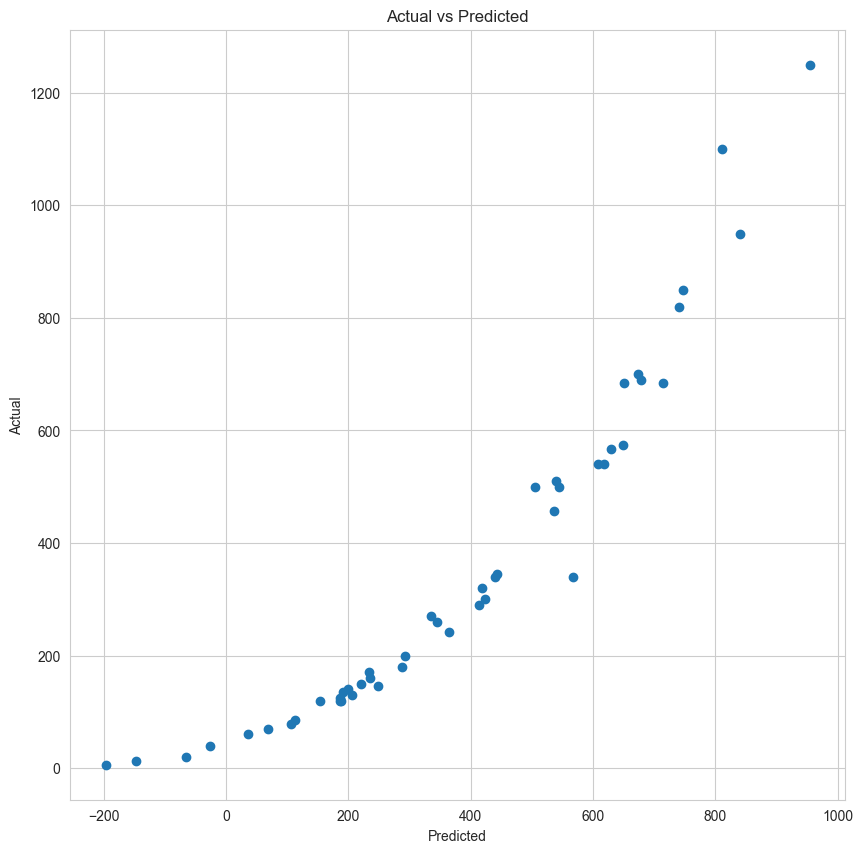

In [76]:
# Set the size of the plot to (10,10)
plt.figure(figsize=(10,10))
plt.scatter(x=Y_pred , y=ytest)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Actual vs Predicted")
plt.grid(True)
# Show the plot
plt.show()

Computing and printing the root mean square error (RMSE), R-squared, adjusted R-squared, and mean absolute error (MAE) of our machine learning model.

In [77]:
rmse = np.sqrt(mean_squared_error(ytest, Y_pred))
mae = mean_absolute_error(ytest, Y_pred)
r2 = r2_score(ytest, Y_pred)
print(f"Root Mean Square Error : {rmse}")
print(f"Mean Absolute Error : {mae}")
print(f"R square : {r2}")

Root Mean Square Error : 105.51481235862047
Mean Absolute Error : 85.09292107303449
R square : 0.876598726507326


# Dimensionality Reduction (PCA)

In this section we will recreate our model but this time using the reduced features we get by applying PCA to our initial features for dimesionality reduction.

Defining a function to scale our features

In [78]:
def standard_scaler(X):
    # Calculate the mean of the input array, X, along the columns (axis=0)
    mean = np.mean(X, axis=0)
    # Calculate the standard deviation of the input array, X, along the columns (axis=0)
    scale = np.std(X, axis=0)
    # Scale the input array by subtracting the mean and dividing by the standard deviation
    X_scaled = (X - mean) / scale
    # Return the scaled array
    return X_scaled

Scaling our features by standardizing them

In [79]:
# Drop the "target" column from the DataFrame "df"
scaled_features = df.drop(columns=["Species", "Length2", "Length3", "Weight"])
# Scale the features using the "standard_scaler" function
scaled_features = standard_scaler(scaled_features)
# Create a new DataFrame "scaled_df" using the scaled features
scaled_df = pd.DataFrame(data=scaled_features, columns=scaled_features.columns)
# Add the "target" column back to the scaled DataFrame
scaled_df["Target"] = df["Weight"]
# Displaying the scaled DataFrame
scaled_df

,Length1,Height,Width,Target
0,-0.270151,0.595965,-0.213412,242.0
1,-0.182146,0.818680,-0.042068,290.0
2,-0.193146,0.794970,0.192211,340.0
3,0.070870,0.876678,0.047864,363.0
4,0.092871,0.810328,0.454927,430.0
...,...,...,...,...
154,-1.557230,-1.591653,-1.789107,12.2
155,-1.535229,-1.512867,-1.863861,13.4
156,-1.491226,-1.548363,-1.871780,12.2
157,-1.370218,-1.410140,-1.384984,19.7


Performing principal component analysis (PCA) on a dataset with scaled features.The PCA object is initialized with n_components=1, which means that the result of the PCA transformation will result in 1 principal components (or reduced dimensions) of the original data. The fit method is applied to the scaled features to fit the PCA model to the data.
Finally, the transformed features are obtained by applying the transform method to the original features (feature_df), and the shape of the reduced features is obtained by calling the shape attribute.

In [80]:
# Creating an instance of PCA with 1 component
pca = PCA(1)
# Fit the scaled data to the PCA model
pca.fit(scaled_df.drop(columns = "Target"))
# Transform the scaled data to reduced features using the PCA model
reduced_features = pca.transform(scaled_df.drop(columns = "Target"))
# Print the shape of the original and reduced features
print(f"original features shape : {scaled_df.shape}")
print(f"reduced features shape : {reduced_features.shape}")

original features shape : (156, 4)
reduced features shape : (156, 1)


Creating a new Pandas DataFrame called reduced_dataset from the reduced_features obtained from the PCA transformation. Also adding a new column called "Target" to the reduced_dataset DataFrame, which contains the values of the "Weight" column from the original DataFrame (df).

In [81]:
# Create a dataframe from the reduced features
reduced_dataset = pd.DataFrame(data = reduced_features, columns = ["feature"])
# Add a column for the target (Weight) to the reduced dataset
reduced_dataset["Target"] = np.array(df["Weight"])

Displaying information on the reduced dataset, such as the number of rows and columns, the data types of columns, and memory usage, among others. 

In [82]:
reduced_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feature  156 non-null    float64
 1   Target   156 non-null    float64
dtypes: float64(2)
memory usage: 2.6 KB


Splitting the reduced_dataset into two datasets, Train and Test, using the train_test_split function from the scikit-learn library in Python. The function splits the data into two sets, with train_size argument set to 0.7, meaning 70% of the data will be used for training and the remaining 30% for testing.

In [83]:
Train, Test = tts(reduced_dataset, train_size = 0.7, random_state = 20)

Preparing the training data for our machine learning model. The variables x_train and y_train are assigned as features and target columns, respectively. The arrays are reshaped using the .reshape() method with the argument -1, 1. This is done because some machine learning algorithms in scikit-learn expect the input data to be two-dimensional, with samples in rows and features in columns.

In [84]:
# Get the "feature" column of the train dataset
x_train = Train.feature
# Get the "Target" column (Weight) of the train dataset
y_train = Train.Target
# Convert the x_train data into a numpy array
x_train_arr = np.array(x_train).reshape(-1,1)
# Convert the y_train data into a numpy array
y_train_arr = np.array(y_train)
# Print the shapes of the x_train_arr and y_train_arr
print(f"x_train_arr shape : {x_train_arr.shape}")
print(f"y_train_arr shape : {y_train_arr.shape}")

x_train_arr shape : (109, 1)
y_train_arr shape : (109,)


Preparing the testing data for our machine learning model. The variables x_train and y_train are assigned as features and target columns, respectively. The arrays are reshaped using the .reshape() method with the argument -1, 1. This is done because some machine learning algorithms in scikit-learn expect the input data to be two-dimensional, with samples in rows and features in columns.

In [85]:
# Get the "feature" column of the test dataset
x_test = Test.feature
# Get the "Target" column (Weight) of the test dataset
y_test = Test.Target
# Convert the x_test data into a numpy array
x_test_arr = np.array(x_test).reshape(-1,1)
# Convert the y_test data into a numpy array
y_test_arr = np.array(y_test)
# Print the shapes of the x_test_arr and y_test_arr
print(f"x_test_arr shape : {x_test_arr.shape}")
print(f"y_test_arr shape : {y_test_arr.shape}")

x_test_arr shape : (47, 1)
y_test_arr shape : (47,)


Creating an object of class Linear_Regression and naming it model_pca as we are using the reduced version of the dataset to train our model. Also calling the fit method is used to fit our linear regression model to the training data, represented by "x_train_arr" and "y_train_arr". The method returns two values, "updated_weights" and "updated_bias", which are the updated values for the model's weights and bias, respectively. 

In [86]:
# Create an instance of the Linear Regression model
model_pca = Linear_Regression()
# Fit the model using the training data
model_pca.fit(x_train_arr, y_train)

(array([-184.70290623]), 381.0069819728964)

Using the predict method of our machine learning model to make predictions on the testing data. 

In [87]:
ypred = model_pca.predict(x_test_arr)

Evaluating the performance of our machine learning model on the training and testing data comparing it with our original dataset.

In [88]:
print(f"Root Mean Square Error : {np.sqrt(mean_squared_error(y_test, ypred))}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test, ypred)}")
print(f"R square : {r2_score(y_test, ypred)}")

Root Mean Square Error : 109.64484699975827
Mean Absolute Error : 83.79189371483457
R square : 0.8667493821412181


# Conclusion

In this section we will summarize the results and findings of our study and analysis in the context of our model based on the the evaluation metrics calculated for the two regression models trained on the reduced and original datasets.

In [89]:
print(f"Root Mean Square Error (Original Dataset) : {rmse}")
print(f"Root Mean Square Error (reduced Dataset) : {np.sqrt(mean_squared_error(y_test, ypred))}")
print("---------------------------------------------------------------")
print(f"Mean Absolute Error (Original Dataset): {mae}")
print(f"Mean Absolute Error (reduced Dataset) : {mean_absolute_error(y_test, ypred)}")
print("---------------------------------------------------------------")
print(f"R square (Original Dataset): {r2}")
print(f"R square (reduced Dataset) : {r2_score(y_test, ypred)}")

Root Mean Square Error (Original Dataset) : 105.51481235862047
Root Mean Square Error (reduced Dataset) : 109.64484699975827
---------------------------------------------------------------
Mean Absolute Error (Original Dataset): 85.09292107303449
Mean Absolute Error (reduced Dataset) : 83.79189371483457
---------------------------------------------------------------
R square (Original Dataset): 0.876598726507326
R square (reduced Dataset) : 0.8667493821412181


Based on our above evaluation metrics, the regression models trained on both the original and reduced datasets provide a good fit to the data. The R-squared values indicate that around 87% and 86% of the variation in the dependent variable is explained by the independent variables in the model, respectively. 

The RMSE is slightly higher for the model trained on the reduced dataset (109.64) compared to the model trained on the original dataset (105.51) meanining that our original dataset has slightly better accurate predictions compare to reduced dataset.

The MAE values provide a measure of the average magnitude of the errors in the predictions, without considering their direction. In our case, the MAE is slightly lower for the model trained on the reduced dataset (83.79) compared to the model trained on the original dataset (85.09).

In conclusion, both models provide good fits to the data, but the model trained on the reduced dataset may be preferred due to its slightly lower MAE value.